# TITLE

## Final Project Submission

Please fill out:
* __Student name:__ Cassarra Groesbeck
* __Student pace:__ Part Time/ Flex
* __Scheduled project review date/time:__ 
* __Instructor name:__ 
* __Blog post URL:__



# 1. Introduction 
- Every year, more than 795,000 people in the United States have a stroke. About 610,000 of these are first or new strokes. About 87% of all strokes are ischemic strokes, in which blood flow to the brain is blocked.[Apr 5, 2022, CDC.gov](https://www.cdc.gov/stroke/facts.htm)

- From 1990 to 2019, the change in the prevalence of stroke in the general population increased by about 60%. [Feb 3, 2022, newsroom.heart.org](https://newsroom.heart.org/news/u-s-stroke-rate-declining-in-adults-75-and-older-yet-rising-in-adults-49-and-younger)

- Strokes are the No. 5 cause of death and a leading cause of disability in the United States. 80% of strokes are preventable.[American Stoke Association](https://www.stroke.org/en/about-stroke)



## 1a. Objectives
Because of the nature of this problem, and in order to capture as many potential stroke victims as possible, I feel it appropriate to be very aggressive with stroke predictions. For this reason I have chosen Recall as the evaluation metric for my models. This will inevitably lead to extra false positives, however, because of the health risks associated with strokes, I feel the measures needed to declare an individual to NOT be at risk, outweigh a misclassification of at risk.


## 1b. Business Understanding

# 2. Data Understanding
This dataset contains 5110 observations with 12 attributes (11 clinical features) for predicting stroke events. 


### 2a. Attribute Information
| Column     | Description   |
|------------|:--------------|
| `id`               | **unique identifier**  |
| `gender`           | **"Male", "Female" or "Other"**  |
| `age`              | **age of the patient** |
| `hypertension`     | **0 if the patient doesn't have hypertension, 1 if the patient has hypertension**  |
| `heart_disease`    | **0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease**   |
| `ever_married`     | **"No" or "Yes"**  |
| `work_type`        | **"children", "Govt_jov", "Never_worked", "Private" or "Self-employed"**   |
| `Residence_type`   | **"Rural" or "Urban"**  |
| `avg_glucose_level`| **average glucose level in blood**  |
| `bmi`              | **body mass index** |
| `smoking_status`   | **"formerly smoked", "never smoked", "smokes" or "Unknown"***  |
| `stroke`           | **1 if the patient had a stroke or 0 if not**  |
|    **_*Note:_**      | _"Unknown" in_ `smoking_status` _means that the information is unavailable for this patient_ |


### 2b. Acknowledgements
Data comes from the [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) and can be found on [kaggle](https://www.kaggle.com).

# 3. Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('seaborn')
sns.set_style('darkgrid', {'axes.facecolor': '0.9', "grid.color": ".6", "grid.linestyle": ":"})
%matplotlib inline

import xgboost

from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.combine import SMOTETomek

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, \
ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report, plot_roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

seed = 42

# 4. Exploring the Raw Data

### 4a. Load and Visually Check the Data

In [2]:
df = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')

In [3]:
# Visual check of raw df
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 4b. Drop Unnecessary `id` Column, and Identify Target Feature

In [4]:
# Drop 'id' column
df = df.drop('id', axis=1)

In [5]:
# Identify Target Feature
target = 'stroke'

### 4c. The Basics

In [6]:
df.shape

(5110, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### 4d. Exploring Nulls

In [9]:
# percent of missing data
f'{(201/5110)*100:.3}%'

'3.93%'

In [10]:
# just the nulls
bmi_nulls = df[df['bmi'].isnull()]
# `stroke` patients with missing `bmi` data
bmi_nulls['stroke'].value_counts()

0    161
1     40
Name: stroke, dtype: int64

### 4e. Distribution of Values

In [11]:
print('-'*30)
print('Distribution of Target Feature')
print('-'*30)
print('COUNTS:')
print(df[target].value_counts())
print('- '*15)
print('PERCENTAGES:')
for value in [norm_value_count for norm_value_count \
                in enumerate(df[target].value_counts(normalize=True))]:
    print(f'{value[0]}\t{value[1]*100:.4}%')
print(f'Name: {target}, dtype: int64') # just for symmetry
print('-'*30)

------------------------------
Distribution of Target Feature
------------------------------
COUNTS:
0    4861
1     249
Name: stroke, dtype: int64
- - - - - - - - - - - - - - - 
PERCENTAGES:
0	95.13%
1	4.873%
Name: stroke, dtype: int64
------------------------------


In [12]:
show = df.drop(target, axis=1)

print("-"*30)
print(f'Distribution of Other Features')
print("-"*30)
for column in show.columns:
    print("-"*30)
    print(f"UNIQUE VALUES: {len(show[column].unique())}")
    if len(show[column].unique()) <= 5:
        print("- "*15)
        print(show[column].value_counts())
    else:
        print("- "*15)
        print(f'\t\t  MIN: {show[column].min()}')
        print(f'\t\t  MEAN: {round(show[column].mean())}')
        print(f'\t\t  MAX: {show[column].max()}')
        print((f'Name: {column}, dtype: float64')) 
    print("-"*30)

------------------------------
Distribution of Other Features
------------------------------
------------------------------
UNIQUE VALUES: 3
- - - - - - - - - - - - - - - 
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
------------------------------
------------------------------
UNIQUE VALUES: 104
- - - - - - - - - - - - - - - 
		  MIN: 0.08
		  MEAN: 43.0
		  MAX: 82.0
Name: age, dtype: float64
------------------------------
------------------------------
UNIQUE VALUES: 2
- - - - - - - - - - - - - - - 
0    4612
1     498
Name: hypertension, dtype: int64
------------------------------
------------------------------
UNIQUE VALUES: 2
- - - - - - - - - - - - - - - 
0    4834
1     276
Name: heart_disease, dtype: int64
------------------------------
------------------------------
UNIQUE VALUES: 2
- - - - - - - - - - - - - - - 
Yes    3353
No     1757
Name: ever_married, dtype: int64
------------------------------
------------------------------
UNIQUE VALUES: 5
- 

### 4f. Visualization of Distribution of Values 

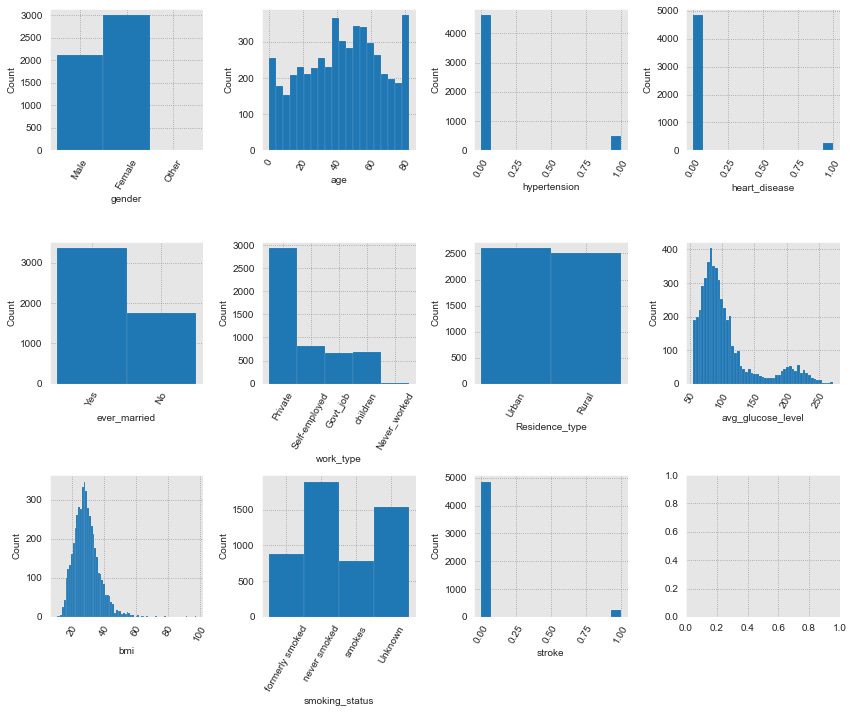

In [13]:
# setup
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(12, 10))
fig.set_tight_layout(True)
# plot
for index, col in enumerate(df.columns):
    ax = axes[index//4][index%4]
    sns.histplot(data=df[col], ax=ax, linewidth=0.1, alpha=1)
    ax.tick_params(axis='x', rotation=60)

### NOTES:

- `gender`
 - There is only 1 'other' value, for simplicity I will drop this 1 row.
 - About 1000 more women than men in this dataset.
- `age`
 - The youngest patient is under 1 yo. Oldest patient is 82.
 - Decent distribution, 
 - Average age of patients in this dataset are 43 years old. 
- `hypertension`
 - Binary, 1 if the patient has hypertension.
 - Very similar distribution as target feature.
- `heart_disease`
 - Binary, 1 if the patient has heart disease.
 - Almost identical distribution as target feature.
 - I am curious how `hypertension` & `heart_disease` will correlate with eachother. 
- `ever_married`
 - About 65/35 split with majority of patients listed as 'Yes.'
- `work_type`
 - Only 5 categories. Not surprisingly, more than half answered 'Private.'
 - Other 4 make up little more than 40%.
 - 'Never_worked' is less than 1%.
- `Residence_type`
 - Almost 50/50 split between 'Urban' and 'Rural.'
- `avg_glucose_level` & `bmi` 
 - continuous features that are both skewed positively.
 - `bmi` is missing 201 values (3.93%). Of those missing values, 40 are stroke patients.
   - because of this missing data an imputer is required for modeling
- `smoking_status`
 - about 30% of patients are listed as 'Unknown.'


### 4g. As indicated above in NOTES: Drop 1 'other' value in `gender`

In [14]:
data = df.drop(df[df['gender']=='Other'].index)

# 5. Seperate and Split Data

### 5a. Separate data into features and target

In [15]:
X = data.drop(target, axis = 1)
y = data[target]

### 5b. Split data into train and test sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, 
                                                    test_size=.2, 
                                                    random_state=seed)

# 6. Which features are better predictors?

When modeling, I would like to start with just a couple features, which likely play a strong role in predicting strokes; these features should be information that can be easily collected from new users when joining Heyday. 

### 6a. Make a visualization data frame with `X_train` and `y_train`

In [17]:
viz_df = pd.concat([X_train, y_train], axis=1)
viz_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
845,Female,48.0,0,0,Yes,Private,Urban,69.21,33.1,never smoked,0
3745,Female,29.0,0,0,No,Private,Urban,84.19,21.2,never smoked,0
4184,Female,35.0,0,0,Yes,Private,Rural,119.40,22.9,never smoked,0
3410,Male,38.0,0,0,Yes,Private,Rural,108.68,32.7,never smoked,0
284,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0


### 6b. Pair Plot
I will start with a pair plot; this will help me visualize relationships between each variable.

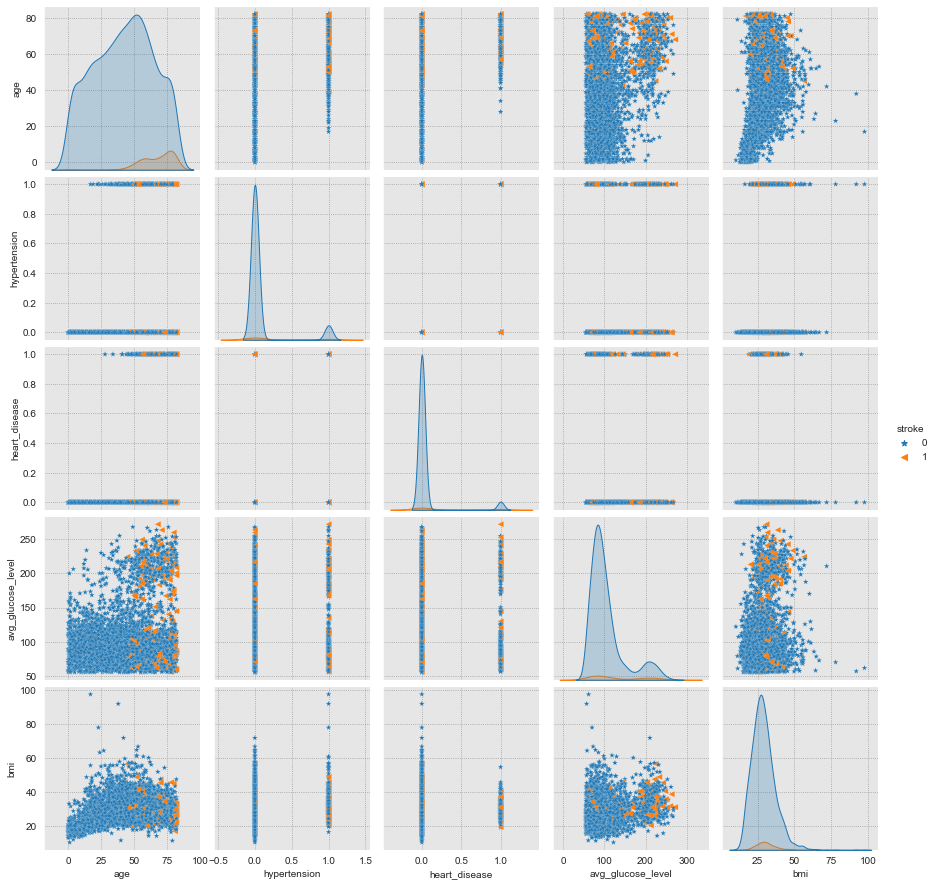

In [18]:
sns.pairplot(viz_df, hue='stroke', markers=['*','<'], plot_kws={'linewidth':0.1});

### NOTES:
`age` appears to be an interesting feature worthy of further investigation. 

The pair plot is great when comparing continuous features however it is useless when comparing two binary features, notice hypertension-heart_disease. Technically these features are categorical, with 1 and 0 representing "Yes" and "No," so it is not surprising the pairplot does not reveal much about these features as they are masquerading around under the ruse of numeric values. On that same note, it is important to note, the pairplot excludes categorical features altogether. Notice `gender`, `ever_married`, `work_type`, `Residence_type`, and `smoking_status` are absent. These features will need to be explored seperately. But first, based on short comings of the pair plot, I would like to add a feature to better understanding the relationship between hypertension and heart_disease; I will call this new feature `hyper_heart`. Secondly, based on the insight of the pairplot, I want to add a feature that seperates out patients who are 55 and up. Not only is this around the age stoke likelihood appears to increase, but it is also the target audiance for Heyday users.  


# 7. Adding Features
I will add two features to `viz_df`(remember this is X_train and y_train concatenated) then explore the categorical features. 
- `age_55+`
 - The values in this column will be 
   - 1 : patients 55 and above
   - 0 : patients 54 and below 
- `hyper_heart`
 - The values in this column will be 
   - 1 : patients with hypertension and heart disease 
   - 0 : if patients do not have BOTH hypertension and heart disease.
 
This is set up as a for loop in case I want to add additional features, or if I decide to add to X_train and X_test. 

In [19]:
dfs = [viz_df]  

for df_to_add_to in dfs:
    # print for reference
    print("\t\t\t\t\tBEFORE ADDING COLUMNS")
    print(df_to_add_to.shape)
    display(df_to_add_to.head())
    
    # create lists for columns
    hyper_heart_col = []
    age_55_plus_col = []
    
    for i in df_to_add_to.index:        
        # Populate hyper_heart_col list
        if (df_to_add_to['hypertension'][i]==1) and (df_to_add_to['heart_disease'][i]==1):
            hyper_heart_col.append(1)
        else:
            hyper_heart_col.append(0)
            
        # Populate age_55_plus_col list
        if df_to_add_to['age'][i] >= 55:
            age_55_plus_col.append(1)
        else:
            age_55_plus_col.append(0)
            
    # Add columns to X_train and X_test
    df_to_add_to['hyper_heart'] = hyper_heart_col
    df_to_add_to['age_55+'] = age_55_plus_col

    print("\t\t\t\t\tAFTER ADDING COLUMNS")
    print(df_to_add_to.shape)
    display(df_to_add_to.head())


					BEFORE ADDING COLUMNS
(4087, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
845,Female,48.0,0,0,Yes,Private,Urban,69.21,33.1,never smoked,0
3745,Female,29.0,0,0,No,Private,Urban,84.19,21.2,never smoked,0
4184,Female,35.0,0,0,Yes,Private,Rural,119.40,22.9,never smoked,0
3410,Male,38.0,0,0,Yes,Private,Rural,108.68,32.7,never smoked,0
284,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0


					AFTER ADDING COLUMNS
(4087, 13)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,hyper_heart,age_55+
845,Female,48.0,0,0,Yes,Private,Urban,69.21,33.1,never smoked,0,0,0
3745,Female,29.0,0,0,No,Private,Urban,84.19,21.2,never smoked,0,0,0
4184,Female,35.0,0,0,Yes,Private,Rural,119.40,22.9,never smoked,0,0,0
3410,Male,38.0,0,0,Yes,Private,Rural,108.68,32.7,never smoked,0,0,0
284,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0,0,0


# 8. Better Visualization of Categorical Features

### 8a. Optimal Labels
For optimal labels, I will convert these sneaky false numeric features into their true categorical form before I plot. 

In [20]:
nums_to_cats = ['stroke', 'hypertension', 'heart_disease', 'hyper_heart', 'age_55+']
for feat in nums_to_cats:
    viz_df[feat] = viz_df[feat].map({1:'Yes', 0:'No'})
    
viz_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,hyper_heart,age_55+
845,Female,48.0,No,No,Yes,Private,Urban,69.21,33.1,never smoked,No,No,No
3745,Female,29.0,No,No,No,Private,Urban,84.19,21.2,never smoked,No,No,No
4184,Female,35.0,No,No,Yes,Private,Rural,119.40,22.9,never smoked,No,No,No
3410,Male,38.0,No,No,Yes,Private,Rural,108.68,32.7,never smoked,No,No,No
284,Male,14.0,No,No,No,Govt_job,Urban,82.34,31.6,Unknown,No,No,No


### 8b. Plotting the Distribution of Categorical Features from X_train and y_train

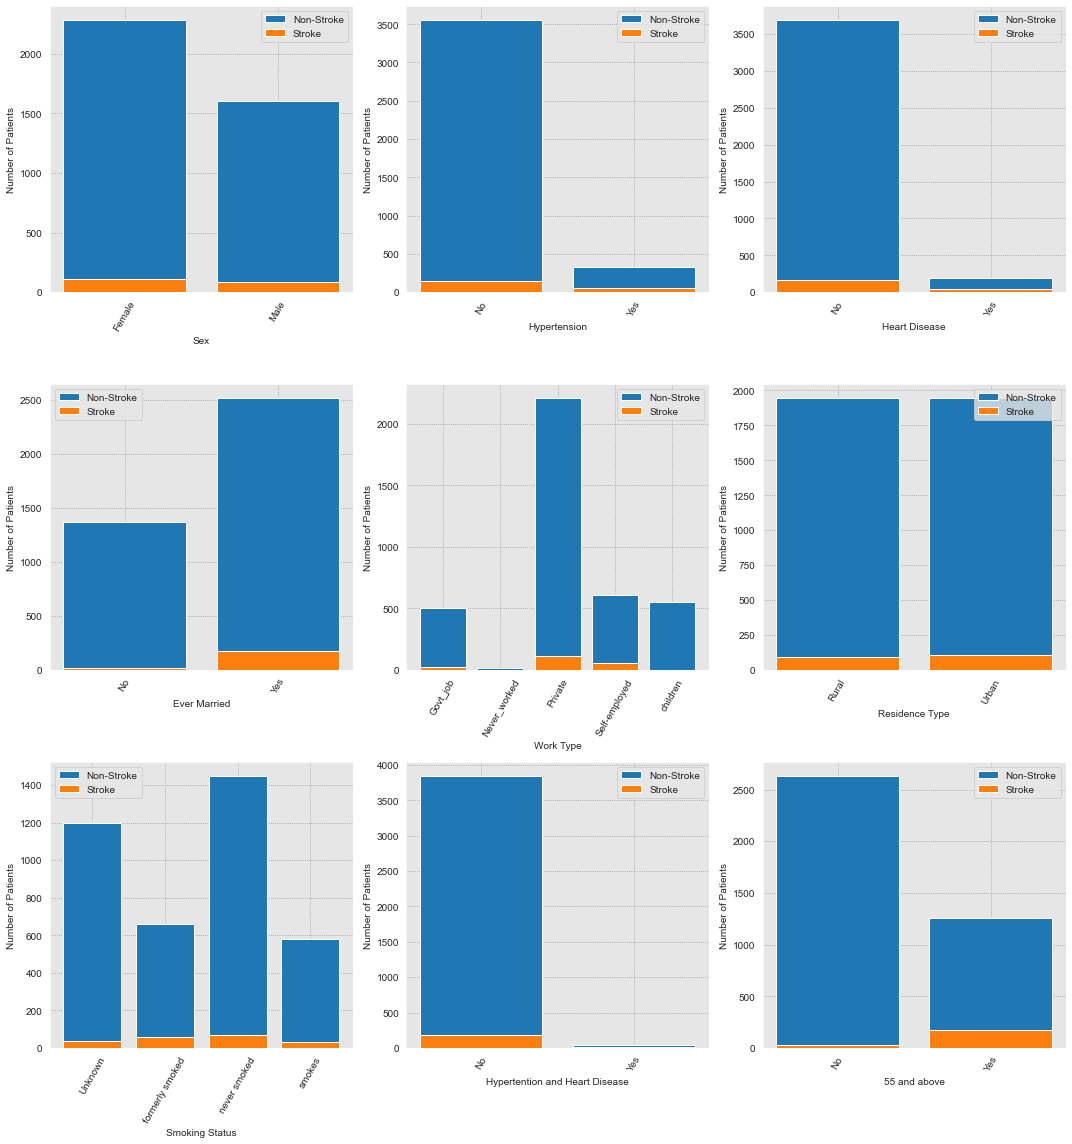

In [21]:
# Set up plot
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 16))
fig.set_tight_layout(True)

# Lists for loops
feats = ['gender',
         'hypertension',
         'heart_disease',
         'ever_married',
         'work_type',
         'Residence_type',
         'smoking_status', 
         'hyper_heart',
         'age_55+']

titles = ['Sex',
         'Hypertension',
         'Heart Disease',
         'Ever Married',
         'Work Type',
         'Residence Type',
         'Smoking Status',
         'Hypertention and Heart Disease', 
         '55 and above']

vals = ['No', 'Yes']

labels = ['Non-Stroke','Stroke']


for i in range(len(feats)):
    # Set up plots
    ax = axes[i//3][i%3]
    ax.set(xlabel=titles[i], ylabel='Number of Patients')
    
    for index in range(2):
        # Define the df 
        bar_df = viz_df[viz_df['stroke']==vals[index]]
        count_df = pd.DataFrame(bar_df.groupby([feats[i]])[feats[i]].count())
        plot_df = count_df.rename(columns={feats[i]: 'count'}).reset_index()

        # Plot
        ax.bar(plot_df[feats[i]], plot_df['count'], label=labels[index]) 
        ax.tick_params(axis='x', rotation=60)
        ax.legend();
        

FINDINGS:

# 9. Function: `check_model` 

### 9a. What it does.
This function does all the heavy lifting for me. Not only can it establish baseline models but it can also handle gridsearch for me. It has the option to change out imputers and scalers. Using smote and scaleing are optional, as well as using test data. It has the ability to output classification reports, threshold tables, and a side by side plot of a confusion maxtrix and ROC curve. With each model check it prints out the details of the classifier, imputer, scaler (if used) and smote method (if used). And finally, it returns the .fit model so I can calculate and save scores to a df (vs reading classification report). 

In [22]:
def check_model(model,
                X_train=X_train,
                X_test=X_test,
                y_train=y_train,
                y_test=y_test, 
                random_state=seed, 
                imputer=None,
                smote=None,             
                scaler=None,
                grid_search=False,
                #param_dict=None,
                use_test_data=False, 
                show_classification_report=False, 
                show_thresholds_table=False,  
                show_plots=False,
                display_labels=None):
    
    """   
    Uses sklearn.model_selection.train_test_split to divide data into train and test sets.
    
    If data has NaN values, an sklearn imputer to must be specified. 
    
    Option to use any sklearn scaler to scale data. 
    Option to use any SMOTE (must be appropiate for data, ie, categorical vs continuous, or both)
    Option to use sklearn GridSearchCV to search for best paramaeters for model.  
    Option to specify use of Test data for evaluation metrics.
    
    
    Output
    ---------- 
    (optional) Classification Report
    (optional) Thresholds, FPRs, TPRs Stats Table with AUC score
    (optional) Plots Confusion matrix and if available an ROC curve
    
    
    Returns
    ----------
    Trained model (model.fit(X_train, y_train))
    
    
    Parameters
    ----------
 
    model : supervised learning model to be evaluated. 
    
    pipe_grid_param_dict : dict or list of dictionaries
        sklearn.model_selection.GridSearchCV parameter: 
            Dictionary with parameters names (`str`) as keys and lists of
            parameter settings to try as values, or a list of such
            dictionaries, in which case the grids spanned by each dictionary
            in the list are explored. This enables searching over any sequence
            of parameter settings.
    
    data : pandas data frame, default=data
    
    target : string or variable set to a string, default=target
    
    test_size : float or int, default=.20
        sklearn.model_selection.train_test_split parameter:
            If float, should be between 0.0 and 1.0 and represent the proportion
            of the dataset to include in the test split. If int, represents the
            absolute number of test samples.
    
    random_state : int or RandomState instance, default=42
        Controls the shuffling applied to the data before applying the split.
        Pass an int for reproducible output across multiple function calls.

    use_test_data : boolean True or False, default=False
        determines the data used to asses model performance
    
    show_thresholds_report : boolean True or False, default=False
        Print table with AUC score, Thresholds, FPR's and TPR's
    
    show_plots : boolean True or False, default=False
        If target variable is binary, plots Confusion Matrix and ROC curve.
        Otherwise just Confusion Matrix
    
    display_labels : list or 'None', default=None
        If the target is binary 0,1 the labels can be changed to more descriptive labels. 
        example: ['Healthy', 'HeartDisease']

    """

    
    ######################################################################
    # 1. TRANSFORM-DATA PIPELINE                                         #
    ######################################################################   
    
    
    # 1a. Seperate by type of data
    cat_col_names = []
    for col in X_train.columns:
        if (col in X_train.select_dtypes('object').columns) or (sorted(X_train[col].unique())==[0,1]):
            cat_col_names.append(col)
            
    
    X_train_cat = X_train[cat_col_names]
    X_train_nums = X_train.drop(cat_col_names, axis=1)
    
    
    #X_train_nums = X_train.select_dtypes('float64')
    #X_train_cat = X_train.select_dtypes('object')


    # 1b. Pipeline 1 (numerical data)
    numerical_pipeline = Pipeline(steps=[
        ('scaler', scaler)])
    
    
    # 1c. Pipeline 2 (categorical data)  
    categorical_pipeline = Pipeline(steps=[
        ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])


    # 1d. Converge pipelines 1 & 2
    trans = ColumnTransformer(transformers=[
        ('numerical', numerical_pipeline, X_train_nums.columns),
        ('categorical', categorical_pipeline, X_train_cat.columns)],
                             remainder='passthrough')
        
    
    # 1e. Model with converged pipeline
    model_pipe = imbpipeline(steps=[
        ('trans', trans),
        ('imputer', imputer),
        ('smote', smote),
        ('model', model)])

    
    ######################################################################
    # 2. GRID SEARCH PIPELINE                                            #
    ######################################################################   
    

    # 2a. Determine if using gridsearch
    if grid_search != False:
        best_model = GridSearchCV(estimator=model_pipe, 
                           param_grid=grid_search, 
                           scoring='recall', 
                           cv=3)

        
        # fit the model to evaluate
        fit_model = best_model.fit(X_train, y_train) 
    
    # if no grid search then .fit converged pipeline
    else: 
        fit_model = model_pipe.fit(X_train, y_train) 
   

    ######################################################################
    # 3. PRINT MODEL DETAILS                                             #
    ######################################################################

    
    # 3a. Determine if using GridSearch
    if grid_search:
        
        """
        # 3a-1. Use .best_params_ dict and reformat to print the same way 
            classifiers/scalers/imputers etc are instantiated.


            Example: 
            ----------

               .best_params_ = {'model__criterion': 'gini', 
                                'model__max_depth': 6, 
                                'scaler__with_mean': True} 

                prints as: 
                    DecisionTreeClassifier(criterion='gini', max_depth=6, ..., N-param=N-value) 
                    StandardScaler(with_mean=True)
        """  
        kind_of_params = {}
        for k,v in fit_model.best_params_.items():
            key = k.split("__")[0]
            if key not in kind_of_params.keys():
                kind_of_params[key] = "" 
            if k.split("__")[1] == 'solver':
                kind_of_params[key] += k.split("__")[1]+"='"+str(v)+"', " # solver has qoutes around it
            elif k.split("__")[1] == 'criterion':
                kind_of_params[key] += k.split("__")[1]+"='"+str(v)+"', " # criterion has qoutes around it
            else: 
                kind_of_params[key] += k.split("__")[1]+"="+str(v)+", " #<-- notice comma


        # 3a-2. Remove extra comma at end of each dic value
        for k, v in kind_of_params.items():
            kind_of_params[k] = v[:-2]


        # 3a-3. Print in copy paste format:
        # Ex. DecisionTreeClassifier(criterion='gini', ..., paramN=value)
        if 'model' in  kind_of_params.keys():
            model_text = str(model).split(")")[0]+", "+kind_of_params['model']+")"
            print(model_text) 
        else:
            print(model) # otherwise, use what was fed into function

   
        if 'imputer' in kind_of_params.keys():
            imputer_text = str(imputer).split("()")[0]+"("+kind_of_params['imputer']+")"
            print(imputer_text)
        else:
            print(imputer)


        if scaler != None:
            if 'scaler' in kind_of_params.keys():
                scaler_text = str(scaler).split("()")[0]+"("+kind_of_params['scaler']+")"
                print(scaler_text) 
            else:
                print(scaler)  


        if smote != None:
            if 'smote' in kind_of_params.keys():
                smote_text = str(smote).split(")")[0]+", "+kind_of_params['smote']+")"
                print(smote_text)
            else:
                print(smote)

    # 3b. If bypassing GridSearch             
    else: 
        
        # 3b-1 Print what was fed into function, example: DecisionTreeClassifier()
        # model & imputer are manditory
        print(model)  
        print(imputer)

        # scaler and/or smote are optional (will not print if not used) 
        if scaler != None:  
            print(scaler)
        if smote != None:
            print(smote)
            
    # 3c. Print type of data used in model evaluation
    if use_test_data:
        data_used_text = "Test"
    else:
        data_used_text = "Train"
    

    ######################################################################
    # 4. (Optional) CLASSIFICATION REPORT                                #
    ######################################################################

    
    # 4a. Assign variables based on data using for evaluation
    if use_test_data:
        X_true = X_test
        y_true = y_test
    else: 
        X_true = X_train
        y_true = y_train
        
    
    if show_classification_report:
        # 4b. Make predictions and print report 
        y_preds = fit_model.predict(X_true)
        cr = classification_report(y_true, y_preds, digits=4)
        print()
        print('-'*54)
        print(f'\t  CLASSIFICATION REPORT : {data_used_text} Data')
        print('-'*54)
        print(cr)
        print('-'*54)
        

        
    ######################################################################
    # 5. (Optional) THRESHOLDS TABLE                                     #
    ######################################################################   
   

    if show_thresholds_table:
        # 5a. Calculate the probability scores
        if ('LogisticReg' in str(model)):
            y_score = fit_model.decision_function(X_true) 
            fpr, tpr, thresholds = roc_curve(y_true, y_score)
        else:
            y_score = fit_model.predict_proba(X_true)
            fpr, tpr, thresholds = roc_curve(y_true, y_score[:,1]) # <-- probability of Class 1

        # 5b. Format values and print
        # To display as: THRESHOLD: value | FPR: percent%, TPR:percent%
        thresh_fp_tp = list(zip(thresholds, fpr, tpr))
        these_to_print = [f'THRESHOLD: {e[0]:.2f} | FPR: {e[1]:.2%}, TPR:{e[2]:.2%}' \
                          for e in thresh_fp_tp]        
        auc_score = auc(fpr, tpr)
        
        print('-'*54)
        print('\t\t  THRESHOLD STATS')
        print('-'*54)
        print(f'AUC: {auc_score}')
        print('- '*23)
        for element in these_to_print:
            print(element)
        print('-'*54)
        

    ######################################################################
    # 6. (Optional) VISUALIZATIONS                                       #
    ######################################################################
    
    
    if show_plots: 
        # Figure set up
        plt.style.use('fivethirtyeight')
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
        fig.suptitle(f'Model Evaluated on {data_used_text} Data', color='tab:blue', size=14)
        

        # Left  
        axes[0].set_title("Confusion Matrix", size=15)  
        axes[0].grid(False)
        plot_confusion_matrix(fit_model, X_true, y_true, 
                              cmap=plt.cm.Blues, 
                              ax=axes[0], 
                              display_labels=display_labels,
                              normalize='true')

        # Right 
        axes[1].set_title("ROC Curve", size=15)
        plot_roc_curve(fit_model, X_true, y_true, ax=axes[1]);
        
    
    return fit_model


print("ran")

ran


In [23]:
########## don't delete yet TESTS FOR FUNCTION

d_tree_dic = {'model__criterion': ['gini', 'entropy'],
 'model__max_depth': [1, 2],
 'model__min_samples_split': [2,10],
 'model__min_samples_leaf': [1, 6]}



zero = round(data[target].value_counts(normalize=True)[1],6)
one = round(data[target].value_counts(normalize=True)[0],6)
class_weight_dic={0:zero, 1: one}

 
log_reg_dict = {'model__C' : [1.0, 1e12],
                'model__fit_intercept' : [True, False],
                'model__class_weight' : ['balanced', class_weight_dic],
                'model__solver' : ['lbfgs','liblinear'],
                'model__max_iter' : [100,500]}



imputer = IterativeImputer(random_state=seed)

# Categorical Column Names
cat_col_names = []
for col in X_train.columns:
    if (col in X_train.select_dtypes('object').columns) or (sorted(X_train[col].unique())==[0,1]):
        cat_col_names.append(col)

# Convert to indices      
cat_col_indices = [X_train.columns.get_loc(col) for col in cat_col_names]


smote=SMOTENC(categorical_features=cat_col_indices, random_state=seed)

In [24]:
model3 = LogisticRegression(random_state=seed)

LogisticRegression(random_state=42)
IterativeImputer(random_state=42)

------------------------------------------------------
	  CLASSIFICATION REPORT : Train Data
------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9513    1.0000    0.9750      3888
           1     0.0000    0.0000    0.0000       199

    accuracy                         0.9513      4087
   macro avg     0.4757    0.5000    0.4875      4087
weighted avg     0.9050    0.9513    0.9276      4087

------------------------------------------------------


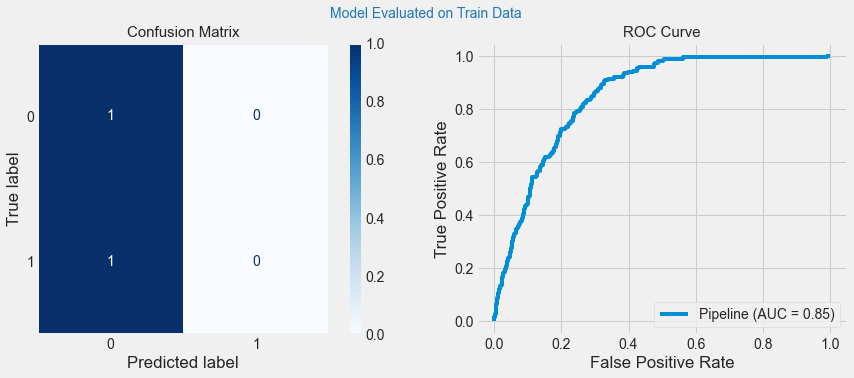

In [25]:
show_model3 = check_model(model3, 
                          imputer=imputer, 
                          show_classification_report=True, 
                          show_plots=True)

LogisticRegression(random_state=42)
IterativeImputer(random_state=42)
SMOTENC(categorical_features=[0, 2, 3, 4, 5, 6, 9], random_state=42)

------------------------------------------------------
	  CLASSIFICATION REPORT : Train Data
------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9839    0.7410    0.8454      3888
           1     0.1311    0.7638    0.2239       199

    accuracy                         0.7421      4087
   macro avg     0.5575    0.7524    0.5346      4087
weighted avg     0.9424    0.7421    0.8151      4087

------------------------------------------------------


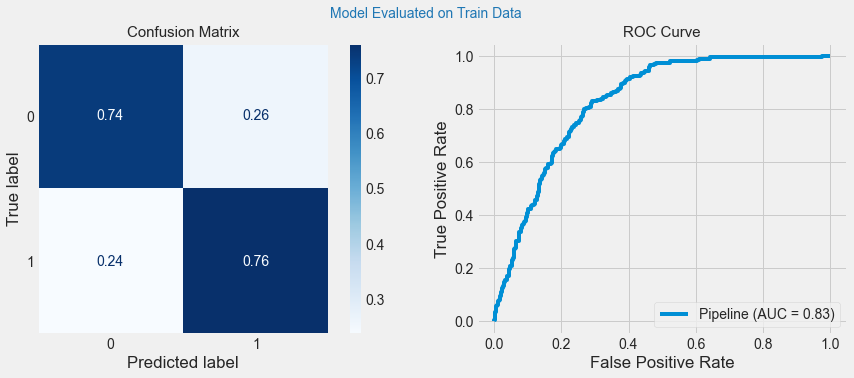

In [26]:
mod3_with_smotenc = check_model(model3, 
                                imputer=imputer, 
                                smote=smote, 
                                show_classification_report=True, 
                                show_plots=True)

LogisticRegression(random_state=42, C=1.0, class_weight={0: 0.048738, 1: 0.951262}, fit_intercept=True, max_iter=100, solver='lbfgs')
IterativeImputer(random_state=42)
SMOTENC(categorical_features=[0, 2, 3, 4, 5, 6, 9], random_state=42)

------------------------------------------------------
	  CLASSIFICATION REPORT : Train Data
------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9992    0.3259    0.4915      3888
           1     0.0702    0.9950    0.1312       199

    accuracy                         0.3585      4087
   macro avg     0.5347    0.6604    0.3113      4087
weighted avg     0.9540    0.3585    0.4739      4087

------------------------------------------------------


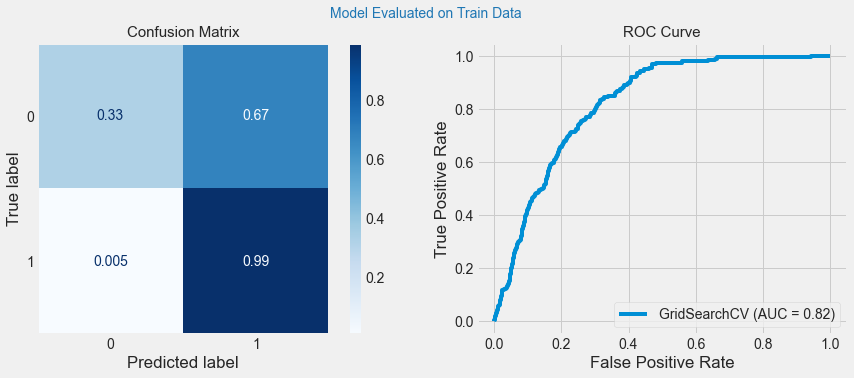

In [27]:
mod3_with_gs = check_model(model3, 
                           imputer=imputer, 
                           smote=smote,
                           grid_search=log_reg_dict,
                           show_classification_report=True,
                           show_plots=True)


LogisticRegression(random_state=42, C=1.0, class_weight={0: 0.048738, 1: 0.951262}, fit_intercept=False, max_iter=100, solver='lbfgs')
IterativeImputer(random_state=42)

------------------------------------------------------
	  CLASSIFICATION REPORT : Train Data
------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9879    0.7333    0.8417      3888
           1     0.1366    0.8241    0.2343       199

    accuracy                         0.7377      4087
   macro avg     0.5622    0.7787    0.5380      4087
weighted avg     0.9464    0.7377    0.8122      4087

------------------------------------------------------


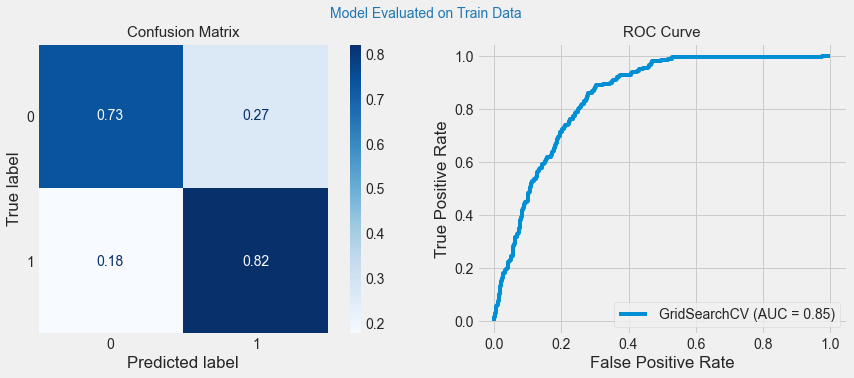

In [28]:
mod3_with_gs_NOsmote = check_model(model3, 
                                   imputer=imputer, 
                                   #smote=smote,
                                   grid_search=log_reg_dict,
                                   show_classification_report=True,
                                   show_plots=True)

LogisticRegression(class_weight={0: 0.048738, 1: 0.951262}, random_state=42)
IterativeImputer(random_state=42)
SMOTENC(categorical_features=[0, 2, 3, 4, 5, 6, 9], random_state=42)

------------------------------------------------------
	  CLASSIFICATION REPORT : Test Data
------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9968    0.3169    0.4809       972
           1     0.0687    0.9800    0.1284        50

    accuracy                         0.3493      1022
   macro avg     0.5327    0.6484    0.3047      1022
weighted avg     0.9514    0.3493    0.4636      1022

------------------------------------------------------


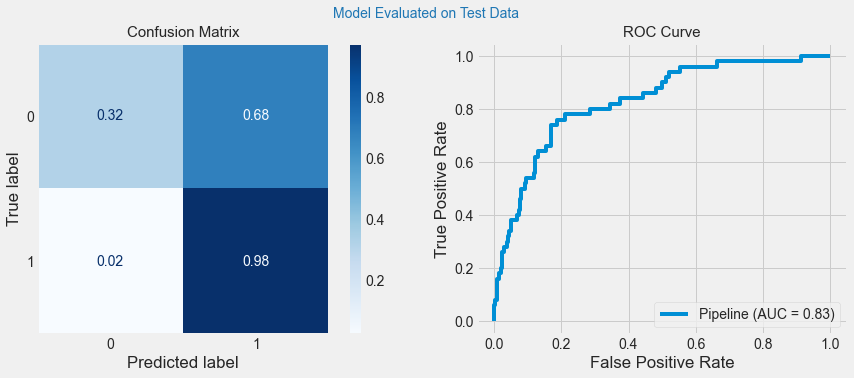

In [29]:

model4 = LogisticRegression(random_state=42, 
                            C=1.0, 
                            class_weight={0: 0.048738, 1: 0.951262}, 
                            fit_intercept=True, 
                            max_iter=100, 
                            solver='lbfgs')

mod4_with_gs_NOsmote = check_model(model4, 
                                   imputer=imputer, 
                                   smote=smote,
                                   use_test_data=True,
                                   show_classification_report=True,
                                   show_plots=True)

In [30]:

##########

# 8. Set up for modeling
Below I will instantiate the classifiers, imputers, scaler, and smotenc I will loop through in step 9

### 8a. Models

In [31]:
log_reg = LogisticRegression(random_state=seed) #class_weight

d_tree = DecisionTreeClassifier(random_state=seed) #class_weight

XGB = XGBClassifier(random_state=seed)

forest = RandomForestClassifier(random_state=seed) #class_weight

bag_tree = BaggingClassifier(DecisionTreeClassifier(random_state=seed))

abc = AdaBoostClassifier(random_state=seed)

etr = ExtraTreesClassifier(random_state=seed)

gbc = GradientBoostingClassifier(random_state=seed)

xgboost_XGB = xgboost.XGBClassifier(random_state=seed, objective='binary:logistic')

knn = KNeighborsClassifier()

### 8b. Imputers

In [32]:
iter_imputer = IterativeImputer(random_state=seed)

sim_immputer = SimpleImputer()

knn_imputer =  KNNImputer()

### 8c. Scaler

In [33]:
scaler = StandardScaler()

### 8d. Smote

In [34]:
# Categorical Column Names
cat_col_names = []
for col in X_train.columns:
    if (col in X_train.select_dtypes('object').columns) or (sorted(X_train[col].unique())==[0,1]):
        cat_col_names.append(col)

# Convert to indices      
cat_col_indices = [X_train.columns.get_loc(col) for col in cat_col_names]


smote=SMOTENC(categorical_features=cat_col_indices, random_state=seed)

# 9. Modeling
### Bypassing GridSearch.
Using forloop to run baselines, scaled and non scaled (StandardScaler when scaled), smote and non smote (SMOTENC when smoted) and putting results in a data frame. Some form of imputation is required due to NaNs in `bmi` so the loop runs through 3 different ways of imputing data (IterativeImputer, SimpleImputer, KNNImputer). Scaling and class imbalance techniques are optional so both have a None added to their list.  Note from step 8a, these models have no parameters yet other than setting a `random_state` (except in KNeighborsClassifier which does not have a `random_state` param).

### 9a. Create Lists for the Loop

In [35]:
models = [log_reg,
          d_tree,
          XGB, 
          forest, 
          bag_tree, 
          abc, 
          etr, 
          gbc, 
          xgboost_XGB, 
          knn]

model_names = ['LogisticRegression',
               'DecisionTreeClassifier',
               'XGBClassifier', 
               'RandomForestClassifier', 
               'BaggingClassifier', 
               'AdaBoostClassifier', 
               'ExtraTreesClassifier', 
               'GradientBoostingClassifier', 
               'xgboost.XGBClassifier', 
               'KNeighborsClassifier']

imputers = [iter_imputer, 
            sim_immputer, 
            knn_imputer]

imputer_names = ['IterativeImputer', 
                  'SimpleImputer', 
                  'KNNImputer']

scalers = [None, scaler]

scaler_names = ['None', 'StandardScaler']

class_imbal = [None, smote]

class_imbal_names = ['None', 'SMOTENC']

### 9b. Create Empty Data Frame to Store Results

In [36]:
results = pd.DataFrame(columns = ['model', 'imputer', 'scaler', 'smote', \
                                  'train_recall', 'test_recall'])
results.head()

,model,imputer,scaler,smote,train_recall,test_recall


In [37]:
# Loop Through Models
for i in range(len(models)):
    model = models[i]
    model_name = model_names[i]
    print('*'*45)
    
    # Though Imputers
    for ind in range(len(imputers)):
        imputer = imputers[ind]
        imputer_name = imputer_names[ind]
        
        # With and Without Scaling
        for index in range(2):
            scaler = scalers[index]
            scaler_name = scaler_names[index]
            
            # With and Without using SMOTENC
            for smote_index in range(2):
                class_imbalance_option = class_imbal[smote_index]
                class_imbal_name = class_imbal_names[smote_index]
                
                # Save Fitted Model and Calculate Train and Test Recall Score
                fitted = check_model(model, imputer=imputer, scaler=scaler, smote=class_imbalance_option)
                train_score = round(recall_score(y_train,fitted.predict(X_train)), 3)
                test_score = recall_score(y_test,fitted.predict(X_test))
                
                print(f'\tTrain data recall score: {train_score}')
                print(f'\tTest data recall score: {test_score}\n')
                
                # Add to `results` df
                results.loc[len(results.index)] = [model_name, imputer_name, scaler_name, \
                                                   class_imbal_name, train_score, test_score] 


*********************************************
LogisticRegression(random_state=42)
IterativeImputer(random_state=42)
	Train data recall score: 0.0
	Test data recall score: 0.02

LogisticRegression(random_state=42)
IterativeImputer(random_state=42)
SMOTENC(categorical_features=[0, 2, 3, 4, 5, 6, 9], random_state=42)
	Train data recall score: 0.764
	Test data recall score: 0.76

LogisticRegression(random_state=42)
IterativeImputer(random_state=42)
StandardScaler()
	Train data recall score: 0.0
	Test data recall score: 0.02

LogisticRegression(random_state=42)
IterativeImputer(random_state=42)
StandardScaler()
SMOTENC(categorical_features=[0, 2, 3, 4, 5, 6, 9], random_state=42)
	Train data recall score: 0.779
	Test data recall score: 0.76

LogisticRegression(random_state=42)
SimpleImputer()
	Train data recall score: 0.0
	Test data recall score: 0.02

LogisticRegression(random_state=42)
SimpleImputer()
SMOTENC(categorical_features=[0, 2, 3, 4, 5, 6, 9], random_state=42)
	Train data recall s

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
SimpleImputer()
StandardScaler()
	Train data recall score: 0.915
	Test data recall score: 0.04

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missin

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42))
KNNImputer()
StandardScaler()
	Train data recall score: 0.814
	Test data recall score: 0.02

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42))
KNNImputer()
StandardScaler()
SMOTENC(categorical_features=[0, 2, 3, 4, 5, 6, 9], random_state=42)
	Train data recall score: 0.985
	Test data recall score: 0.32

*********************************************
AdaBoostClassifier(random_state=42)
IterativeImputer(random_state=42)
	Train data recall score: 0.02
	Test data recall score: 0.02

AdaBoostClassifier(random_state=42)
IterativeImputer(random_state=42)
SMOTENC(categorical_features=[0, 2, 3, 4, 5, 6, 9], random_state=42)
	Train data recall score: 0.08
	Test data recall score: 0.02

AdaBoostClassifier(random_state=42)
IterativeImputer(random_state=42)
StandardScaler()
	Train data recall score: 0.02
	Test data recall score: 0.02

AdaBoostClassifier(random_state=42)
IterativeImputer(random_state=42)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
IterativeImputer(random_state=42)
StandardScaler()
SMOTENC(categorical_features=[0, 2, 3, 4, 5, 6, 9], random_state=42)
	Train data recall score: 0.975
	Test data recall score: 0.22

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_ra

### 9c. View the Data Frame

In [38]:
results.head(20)

,model,imputer,scaler,smote,train_recall,test_recall
0,LogisticRegression,IterativeImputer,None,None,0.000,0.02
1,LogisticRegression,IterativeImputer,None,SMOTENC,0.764,0.76
2,LogisticRegression,IterativeImputer,StandardScaler,None,0.000,0.02
3,LogisticRegression,IterativeImputer,StandardScaler,SMOTENC,0.779,0.76
4,LogisticRegression,SimpleImputer,None,None,0.000,0.02
5,LogisticRegression,SimpleImputer,None,SMOTENC,0.774,0.76
6,LogisticRegression,SimpleImputer,StandardScaler,None,0.000,0.02
7,LogisticRegression,SimpleImputer,StandardScaler,SMOTENC,0.779,0.76
8,LogisticRegression,KNNImputer,None,None,0.000,0.02
9,LogisticRegression,KNNImputer,None,SMOTENC,0.764,0.76


### 9d. Just the Baselines (no scaling or smote)

In [39]:
baselines = results[(results['scaler']=='None')&(results['smote']=='None')]
baselines = baselines.sort_values(['test_recall', 'train_recall'], ascending=False)
baselines.head(10)

,model,imputer,scaler,smote,train_recall,test_recall
16,DecisionTreeClassifier,SimpleImputer,None,None,1.000,0.28
20,DecisionTreeClassifier,KNNImputer,None,None,1.000,0.20
12,DecisionTreeClassifier,IterativeImputer,None,None,1.000,0.18
80,ExtraTreesClassifier,KNNImputer,None,None,1.000,0.06
32,XGBClassifier,KNNImputer,None,None,0.955,0.06
104,xgboost.XGBClassifier,KNNImputer,None,None,0.955,0.06
24,XGBClassifier,IterativeImputer,None,None,0.935,0.06
96,xgboost.XGBClassifier,IterativeImputer,None,None,0.935,0.06
52,BaggingClassifier,SimpleImputer,None,None,0.849,0.06
36,RandomForestClassifier,IterativeImputer,None,None,1.000,0.04


**NOTES:** Not surprising there is a lot of over fitting. This is why GridSearchCV is so important. A note about the baseline imputers: there was not a single imputer that consistantly outperformed the others. 

### 9e. Top Performers

In [40]:
results.sort_values(['test_recall', 'train_recall'], ascending=False)[:20]

,model,imputer,scaler,smote,train_recall,test_recall
11,LogisticRegression,KNNImputer,StandardScaler,SMOTENC,0.784,0.76
3,LogisticRegression,IterativeImputer,StandardScaler,SMOTENC,0.779,0.76
7,LogisticRegression,SimpleImputer,StandardScaler,SMOTENC,0.779,0.76
5,LogisticRegression,SimpleImputer,None,SMOTENC,0.774,0.76
1,LogisticRegression,IterativeImputer,None,SMOTENC,0.764,0.76
9,LogisticRegression,KNNImputer,None,SMOTENC,0.764,0.76
71,AdaBoostClassifier,KNNImputer,StandardScaler,SMOTENC,0.754,0.70
87,GradientBoostingClassifier,IterativeImputer,StandardScaler,SMOTENC,0.769,0.68
63,AdaBoostClassifier,IterativeImputer,StandardScaler,SMOTENC,0.759,0.68
67,AdaBoostClassifier,SimpleImputer,StandardScaler,SMOTENC,0.749,0.68


### NOTES:
Top 5 performers witout any parameter tweaking are:
1. LogisticRegression
2. AdaBoostClassifier
3. GradientBoostingClassifier
4. KNeighborsClassifier
5. DecisionTreeClassifier

# 10. Use GridSearch

### something important to say

# 11. Final Model
why this final model? What is so great about it. how does it solve business problem?